[ 5.        +0.j          0.26604444-0.22323779j -0.32635182+1.85083316j
 -1.        -1.73205081j -1.43969262-0.52400526j -1.43969262+0.52400526j
 -1.        +1.73205081j -0.32635182-1.85083316j  0.26604444+0.22323779j]
[ 5.        +0.j          0.26604444-0.22323779j -0.32635182+1.85083316j
 -0.88302222+0.66341395j -1.43969262-0.52400526j -1.21984631+0.60402277j
 -1.        +1.73205081j -0.32635182-1.85083316j  0.26604444+0.22323779j]
Original Signal (v): [0 1 0 1 1 0 0 1 1]
Reconstructed Signal: [0 1 0 1 1 0 0 1 1]
I am here
[ 5.        +0.j          0.26604444-0.22323779j -0.32635182+1.85083316j
 -1.        -1.73205081j -1.43969262-0.52400526j -1.43969262+0.52400526j
 -1.        +1.73205081j -0.32635182-1.85083316j  0.26604444+0.22323779j]
[ 5.        +0.j          0.26604444-0.22323779j -0.32635182+1.85083316j
 -0.88302222+0.66341395j -1.43969262-0.52400526j -1.21984631+0.60402277j
 -1.        +1.73205081j -0.32635182-1.85083316j  0.26604444+0.22323779j]


<ipython-input-2-e572769b9666>:32: ComplexWarning: Casting complex values to real discards the imaginary part
  reconstructed_signal = np.round(input_data).astype(int)


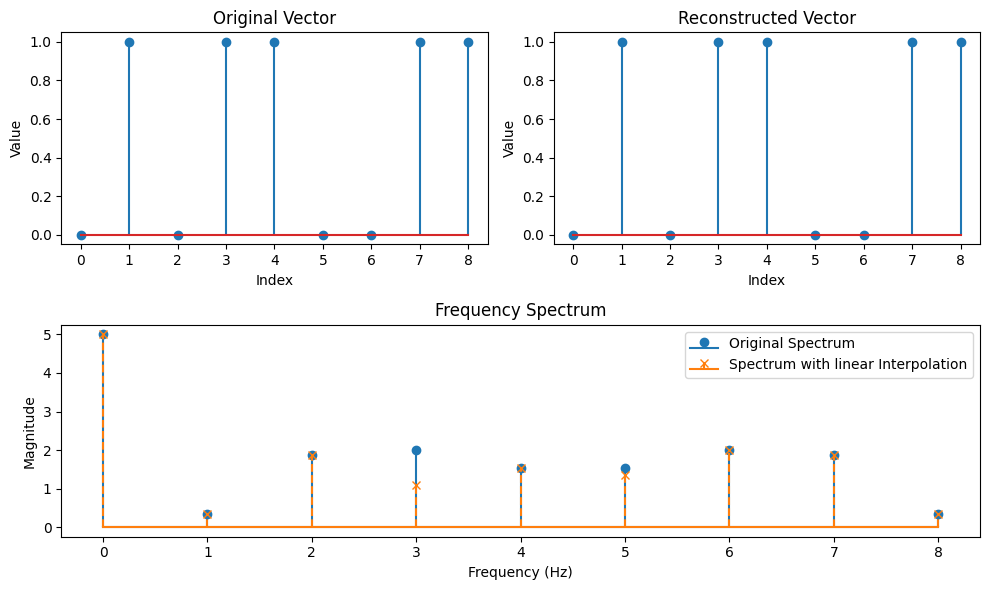

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Given vector v
v = np.array([0, 1, 0, 1, 1, 0, 0, 1, 1])

# Compute the Fourier coefficients using FFT
fourier_coefficients = np.fft.fft(v)

# complex_coeffs = np.fft.ifft(fourier_coefficients)

fourier_coefficients_copy = fourier_coefficients.copy()

# Identify the positions of the missing coefficients (assuming positions 3 and 6 are missing)
missing_indices = [3, 5]
print(fourier_coefficients_copy)

# Perform linear interpolation for each missing coefficient
for idx in missing_indices:
    # Find the two neighboring coefficients
    left_idx = (idx - 1) % len(v)
    right_idx = (idx + 1) % len(v)

    # Compute the linear interpolation for the missing coefficient
    interpolated_coefficient = (fourier_coefficients[left_idx] + fourier_coefficients[right_idx]) / 2.0

    # Replace the missing coefficient with the interpolated value
    fourier_coefficients[idx] = interpolated_coefficient

print(fourier_coefficients)
# Convert the interpolated Fourier coefficients back to the time-domain signal using IFFT
input_data = np.fft.ifft(fourier_coefficients)
reconstructed_signal = np.round(input_data).astype(int)

print("Original Signal (v):", v)
print("Reconstructed Signal:", reconstructed_signal)

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.stem(v)
plt.title("Original Vector")
plt.xlabel("Index")
plt.ylabel("Value")

plt.subplot(2, 2, 2)
plt.stem(reconstructed_signal.tolist())
plt.title("Reconstructed Vector")
plt.xlabel("Index")
plt.ylabel("Value")

print ("I am here")
print(fourier_coefficients_copy)
print(fourier_coefficients)


# Plot frequency spectrum
plt.subplot(2, 1, 2)
plt.stem(np.abs(fourier_coefficients_copy), markerfmt="C0o", linefmt="C0-", basefmt="C0-")
plt.stem(np.abs(fourier_coefficients), markerfmt="C1x", linefmt="C1--", basefmt="C1-")
plt.legend(["Original Spectrum", "Spectrum with linear Interpolation"])
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

 #Plot original vector and reconstructed vector

In [ ]:
import numpy as np

# Given vector v
v = np.array([0, 1, 1, 0, 1, 1, 0, 0, 1])

# Compute the Fourier coefficients using FFT
fourier_coefficients = np.fft.fft(v)

print(fourier_coefficients)

# Identify the positions of the missing coefficients (assuming positions 3 and 6 are missing)
missing_indices = [3, 6]

# Perform linear interpolation for each missing coefficient
for idx in missing_indices:
    # Find the two neighboring coefficients
    left_idx = (idx - 1) % len(v)
    right_idx = (idx + 1) % len(v)

    # Compute the linear interpolation for the missing coefficient
    interpolated_coefficient = (fourier_coefficients[left_idx] + fourier_coefficients[right_idx]) / 2.0

    # Replace the missing coefficient with the interpolated value
    fourier_coefficients[idx] = interpolated_coefficient

print(fourier_coefficients)
# Convert the interpolated Fourier coefficients back to the time-domain signal using IFFT
reconstructed_signal = np.fft.ifft(fourier_coefficients).real

print("Original Signal (v):", v)
print("Reconstructed Signal:", reconstructed_signal)